<a href="https://colab.research.google.com/github/premcodemaster005m-star/ML_Project_4/blob/main/Project4_Breast_Cancer_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# --- 1️⃣ Imports and Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
roc_auc_score, roc_curve, classification_report)
from sklearn.decomposition import PCA


# Optional: Handle imbalance
!pip install -q imbalanced-learn
from imblearn.over_sampling import SMOTE


# --- 2️⃣ Load Dataset ---
df = pd.read_csv('data.csv')
print('Shape:', df.shape)
df.head()


# --- Identify Target Column ---
possible_targets = ['diagnosis','target','label','class']
target_col = [c for c in possible_targets if c in df.columns]
target_col = target_col[0] if target_col else df.columns[-1]


X = df.drop(columns=[target_col, 'Unnamed: 32'])
y = df[target_col]


if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)


# --- Basic Preprocessing ---
num_cols = X.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')
X[num_cols] = imputer.fit_transform(X[num_cols])
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Shape: (569, 33)



## 🔍 Q1. What features are most predictive?

**Explanation:** Features highly correlated with the diagnosis (target) are most predictive.

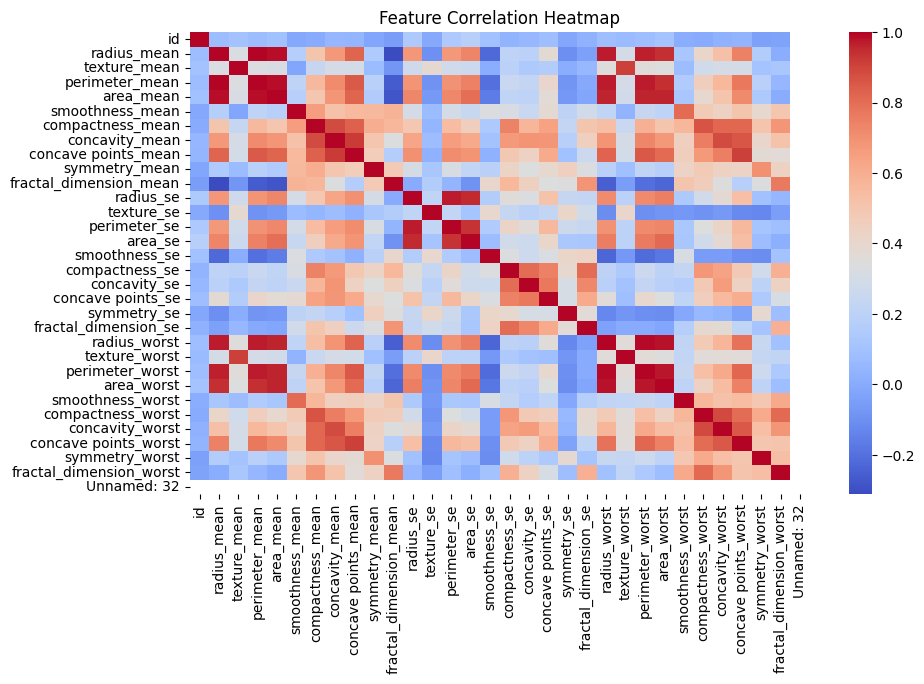

In [61]:
import seaborn as sns

correlation = df.drop('diagnosis', axis=1).corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## ⚙️ Q2. How does KNN work?
**Explanation:** KNN predicts the class of a data point by looking at its *k nearest neighbors* in feature space.


In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

## 📊 Q3. What is accuracy, precision, recall?
**Explanation:**
- **Accuracy** = correct predictions / total predictions
- **Precision** = true positives / (true positives + false positives)
- **Recall** = true positives / (true positives + false negatives)

In [63]:
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Precision:', precision_score(y_test, y_pred_knn))
print('Recall:', recall_score(y_test, y_pred_knn))

Accuracy: 0.956140350877193
Precision: 0.9743589743589743
Recall: 0.9047619047619048


## ⚖️ Q4. How to choose K in KNN?
**Explanation:** The K with the lowest error rate is chosen for best performance.

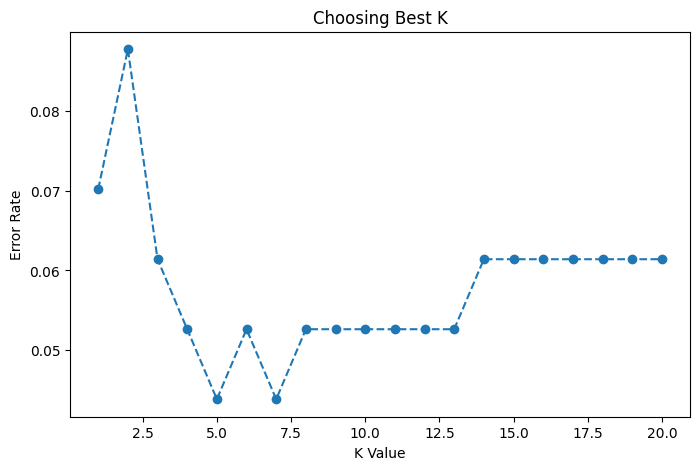

In [64]:
error_rate = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))


plt.figure(figsize=(8,5))
plt.plot(range(1,21), error_rate, marker='o', linestyle='--')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Choosing Best K')
plt.show()

## 📈 Q5. What is ROC-AUC?
**Explanation:** ROC-AUC measures how well the model separates the two classes (1 = perfect, 0.5 = random).


In [65]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Before:', pd.Series(y).value_counts())
print('After:', pd.Series(y_res).value_counts())

Before: 0    357
1    212
Name: count, dtype: int64
After: 1    357
0    357
Name: count, dtype: int64


## ⚖️ Q6. How to handle imbalanced data?
**Explanation:** SMOTE balances data by generating synthetic samples for minority classes.

In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Before:', pd.Series(y).value_counts())
print('After:', pd.Series(y_res).value_counts())

Before: 0    357
1    212
Name: count, dtype: int64
After: 1    357
0    357
Name: count, dtype: int64


## 🔧 Q7. What preprocessing is needed?
**Explanation:** Preprocessing includes removing nulls, scaling features, and encoding categorical data if any.

In [67]:
# Handling missing values
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

## 🌈 Q8. How to visualize decision boundaries?
**Explanation:** Decision boundaries show how the classifier divides regions of different predicted classes.

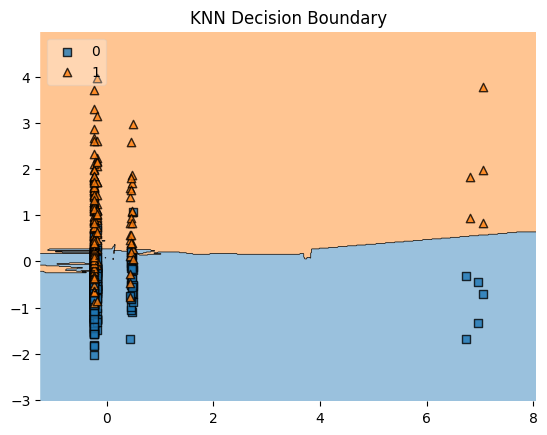

In [68]:
from mlxtend.plotting import plot_decision_regions


# Use only 2 features for visualization
X_vis = X_train.iloc[:, :2].to_numpy()
y_vis = y_train # Use the original integer labels for plotting
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis, y_vis)


plot_decision_regions(X_vis, y_vis, clf=knn_vis, legend=2)
plt.title('KNN Decision Boundary')
plt.show()

## 🔁 Q9. What is overfitting?
**Explanation:** Overfitting occurs when a model performs well on training data but poorly on unseen data.



In [69]:
train_acc = knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)
print('Train Accuracy:', train_acc)
print('Test Accuracy:', test_acc)

Train Accuracy: 0.9604395604395605
Test Accuracy: 0.9385964912280702


## ⚔️ Q10. How to compare models?

**Explanation:** Models can be compared using accuracy, precision, recall, and AUC scores.

In [70]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)


print('KNN Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log))

KNN Accuracy: 0.956140350877193
Logistic Regression Accuracy: 0.9736842105263158


## Q11. How to check feature importance in Logistic Regression?

**Explanation:** Coefficients indicate the strength of each feature in predicting malignancy.

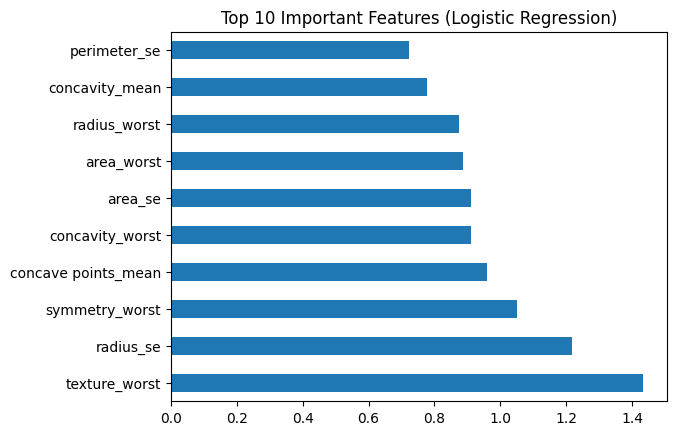

In [71]:
importance = pd.Series(log_reg.coef_[0], index=X.columns)
importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features (Logistic Regression)')
plt.show()

## Q12. How to display the confusion matrix?

**Explanation:** Confusion matrix shows how many predictions are correct or incorrect for each class.

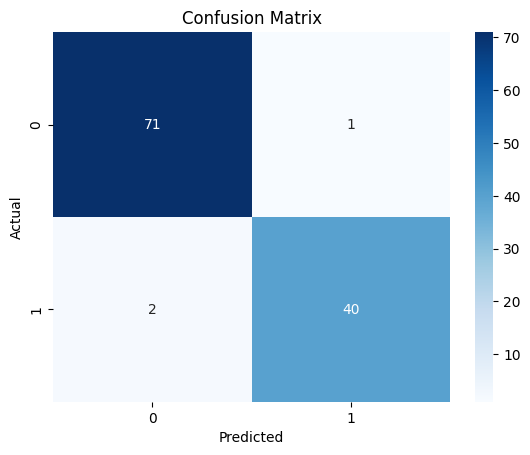

In [72]:
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Q13. How to print full classification report?

**Explanation:** Displays precision, recall, F1-score, and accuracy in a single table.



In [73]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Q14. How to detect outliers in the data?

**Explanation:** Boxplots help visualize outliers that might distort model training.

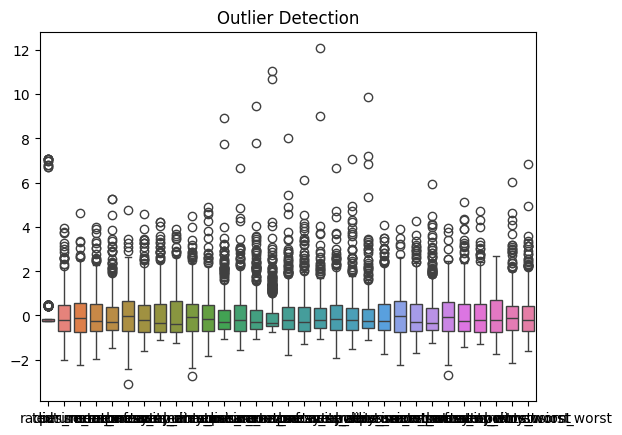

In [74]:
sns.boxplot(data=X)
plt.title('Outlier Detection')
plt.show()


## Q15. How to save and load the trained model?

**Explanation:** Saving models allows reusing them for future predictions without retraining.


In [75]:
import joblib
joblib.dump(log_reg, 'breast_cancer_model.pkl')
model = joblib.load('breast_cancer_model.pkl')
print('Model loaded successfully!')

Model loaded successfully!
